In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc('font', family='Nanum Gothic')

In [7]:
ugg = pd.read_csv('CSV/(W) 어그 코케트 슬리퍼 체스트넛 | UGG | KREAM.csv')
acne = pd.read_csv('CSV/아크네 스튜디오 모헤어 체크 스카프 푸시아 라일락 핑크 | Acne Studios | KREAM.csv')
tnf = pd.read_csv('CSV/(W) 노스페이스 화이트 라벨 노벨티 눕시 다운 자켓 코코아 브라운 | The North Face | KREAM.csv')

In [8]:
def prepare_data(df):
    df['거래일'] = pd.to_datetime(df['거래일'], format='%y/%m/%d')
    df['월별'] = df['거래일'].dt.to_period('M')
    df['거래가'] = df['거래가'].str.replace('원', '').str.replace(',', '').astype(int)
    
    # Add year, month, and season columns
    df['year'] = df['거래일'].dt.year
    df['month'] = df['거래일'].dt.month
    df['season'] = df['거래일'].dt.month % 12 // 3 + 1  # spring=1, summer=2, fall=3, winter=4

    return df

ugg = prepare_data(ugg)
acne = prepare_data(acne)
tnf = prepare_data(tnf)

ugg.tail()

,Unnamed: 0,거래일,옵션,거래가,빠른배송,월별,year,month,season
17995,17995,2022-11-17,US 7W,141000,False,2022-11,2022,11,4
17996,17996,2022-11-17,US 6W,142000,False,2022-11,2022,11,4
17997,17997,2022-11-17,US 6W,142000,False,2022-11,2022,11,4
17998,17998,2022-11-17,US 7W,142000,False,2022-11,2022,11,4
17999,17999,2022-11-17,US 7W,140000,False,2022-11,2022,11,4


In [9]:
acne.tail()

,Unnamed: 0,거래일,옵션,거래가,빠른배송,월별,year,month,season
2473,2473,2021-12-08,ONE SIZE,493000,False,2021-12,2021,12,1
2474,2474,2021-12-04,ONE SIZE,450000,False,2021-12,2021,12,1
2475,2475,2021-12-03,ONE SIZE,449000,False,2021-12,2021,12,1
2476,2476,2021-11-30,ONE SIZE,499000,False,2021-11,2021,11,4
2477,2477,2021-11-30,ONE SIZE,450000,False,2021-11,2021,11,4


In [10]:
tnf.tail()

,Unnamed: 0,거래일,옵션,거래가,빠른배송,월별,year,month,season
4958,4958,2023-10-02,M,391000,False,2023-10,2023,10,4
4959,4959,2023-10-02,M,388000,False,2023-10,2023,10,4
4960,4960,2023-10-01,S,383000,False,2023-10,2023,10,4
4961,4961,2023-10-01,M,390000,False,2023-10,2023,10,4
4962,4962,2023-10-01,S,383000,False,2023-10,2023,10,4


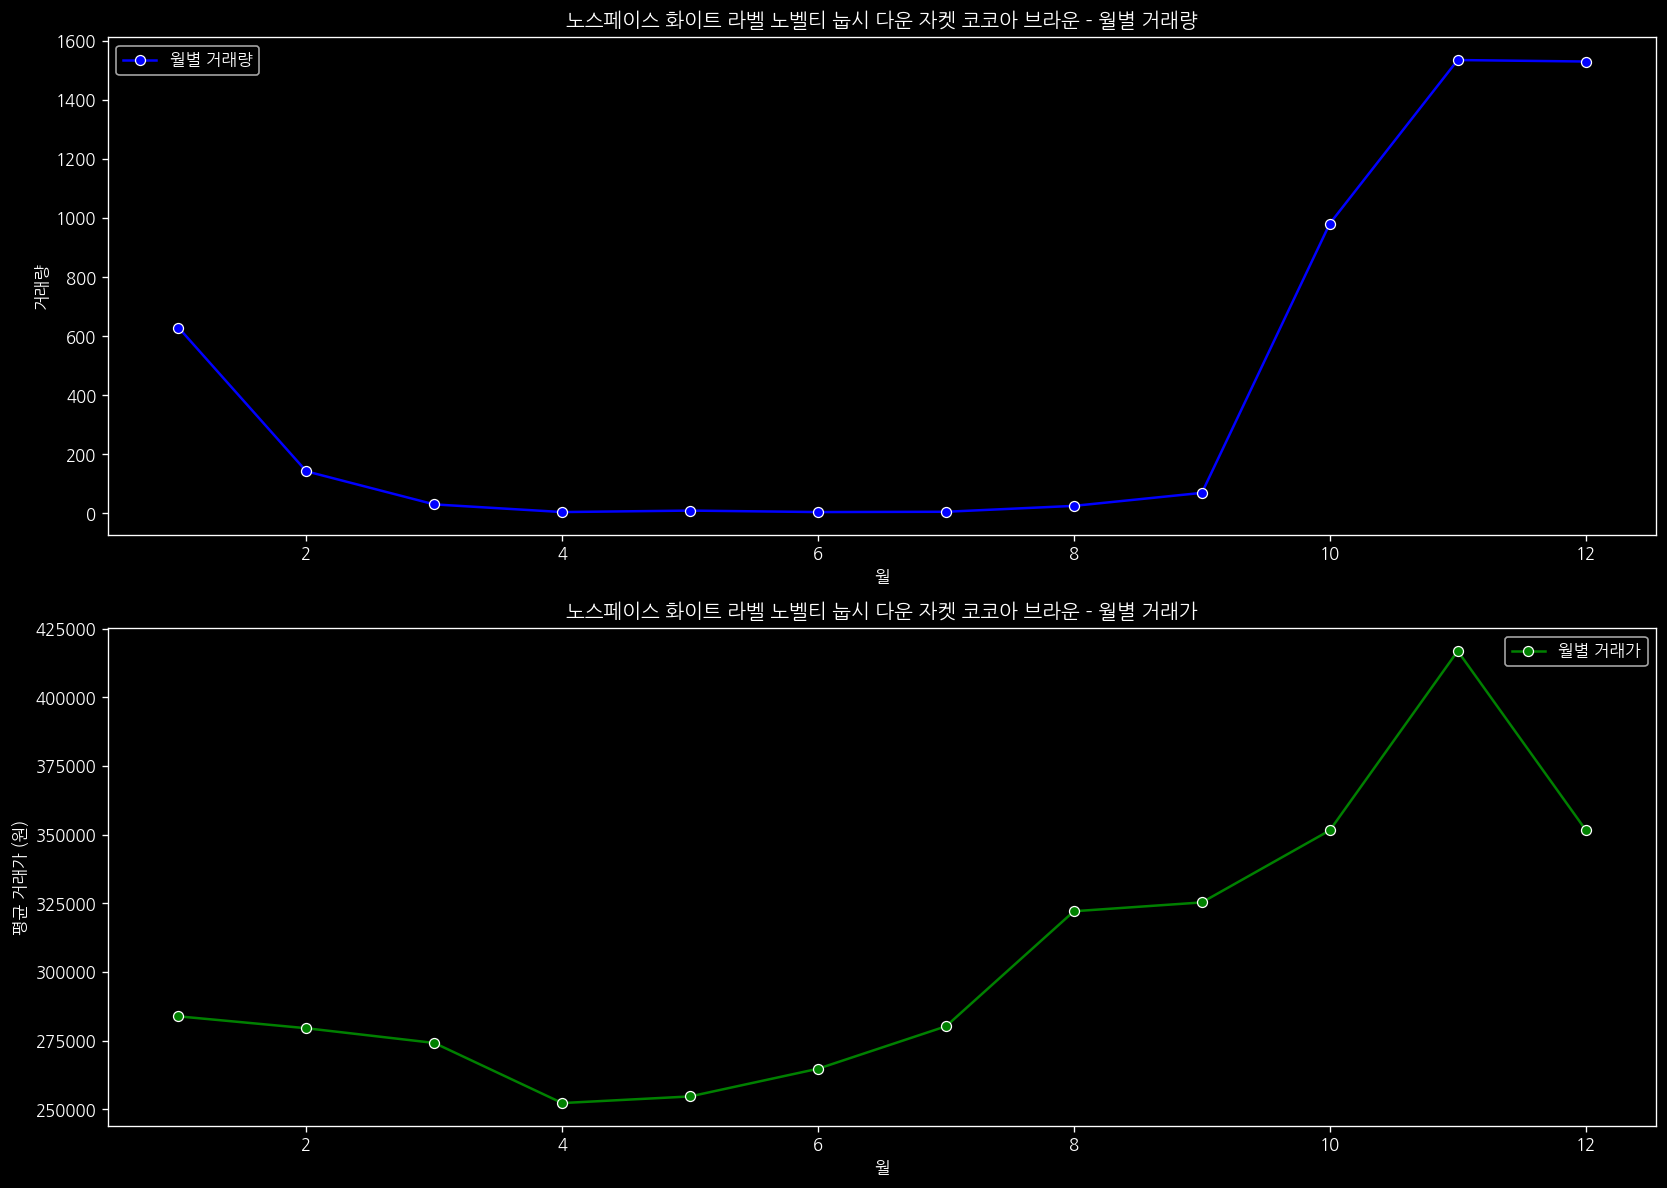

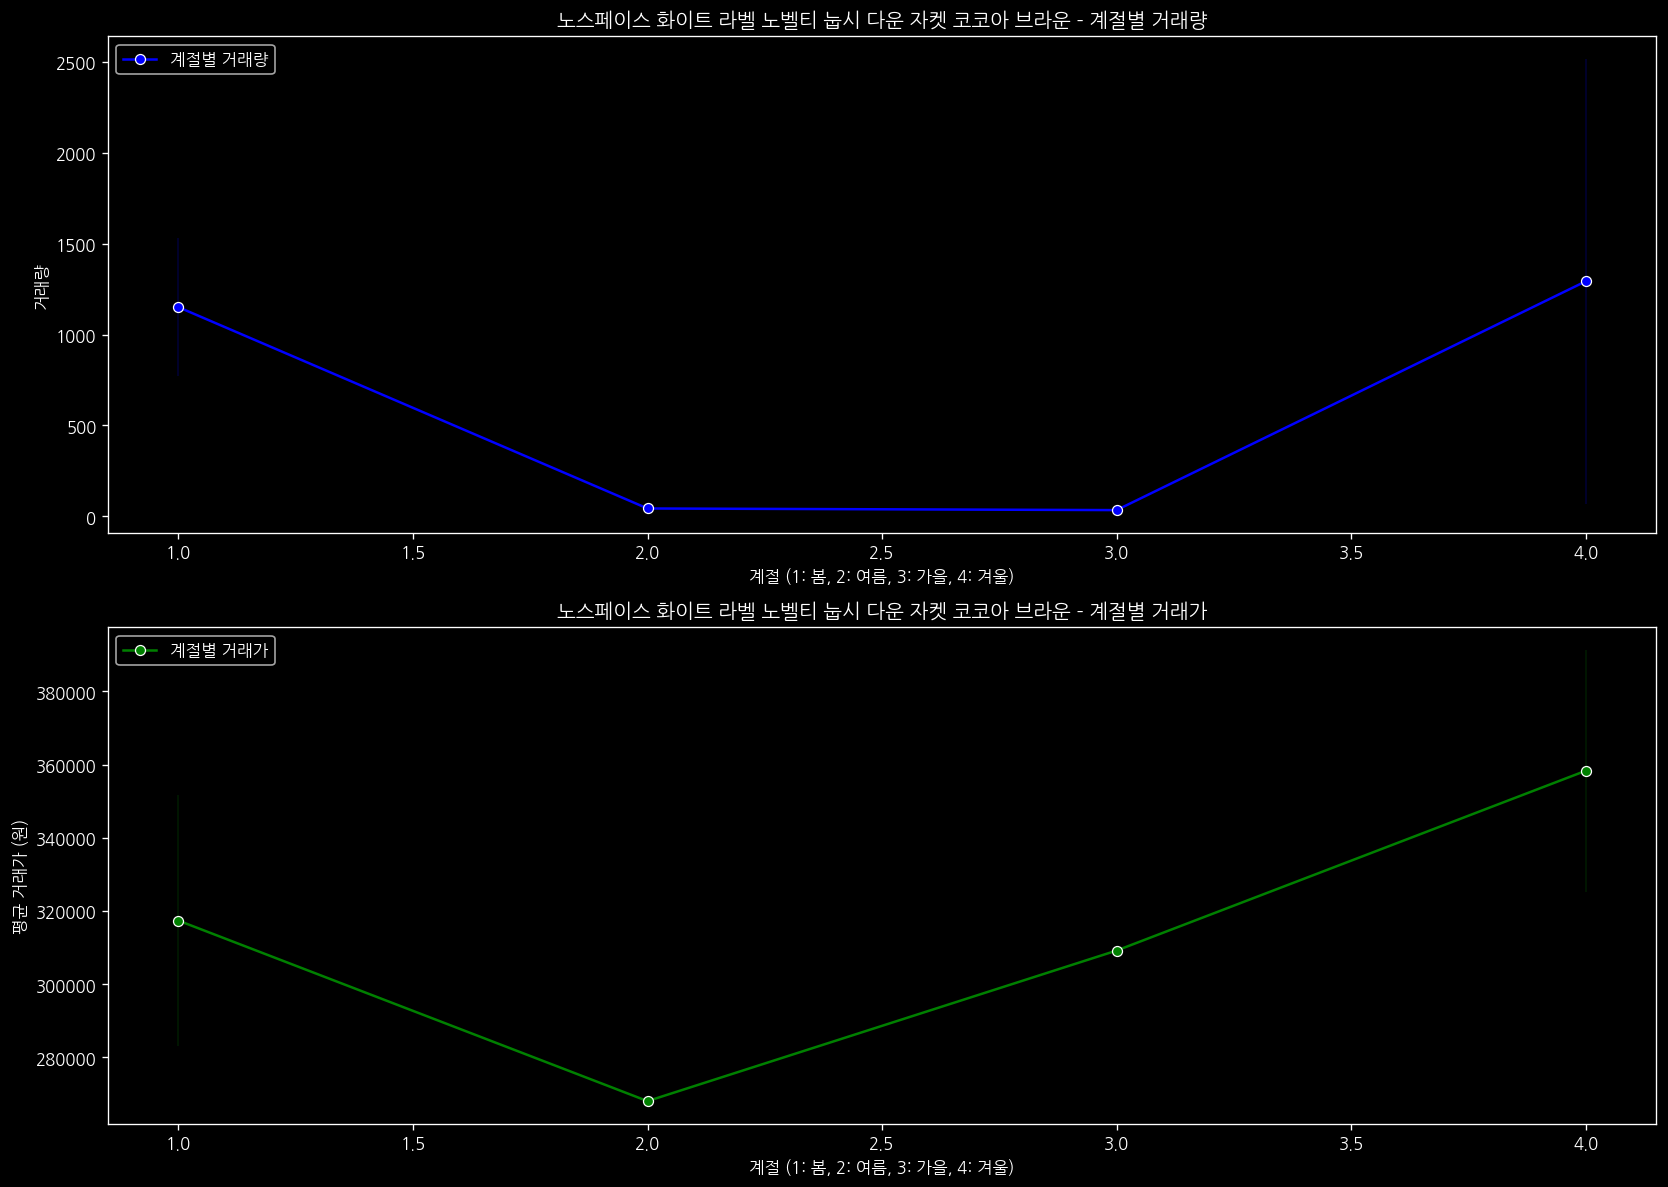

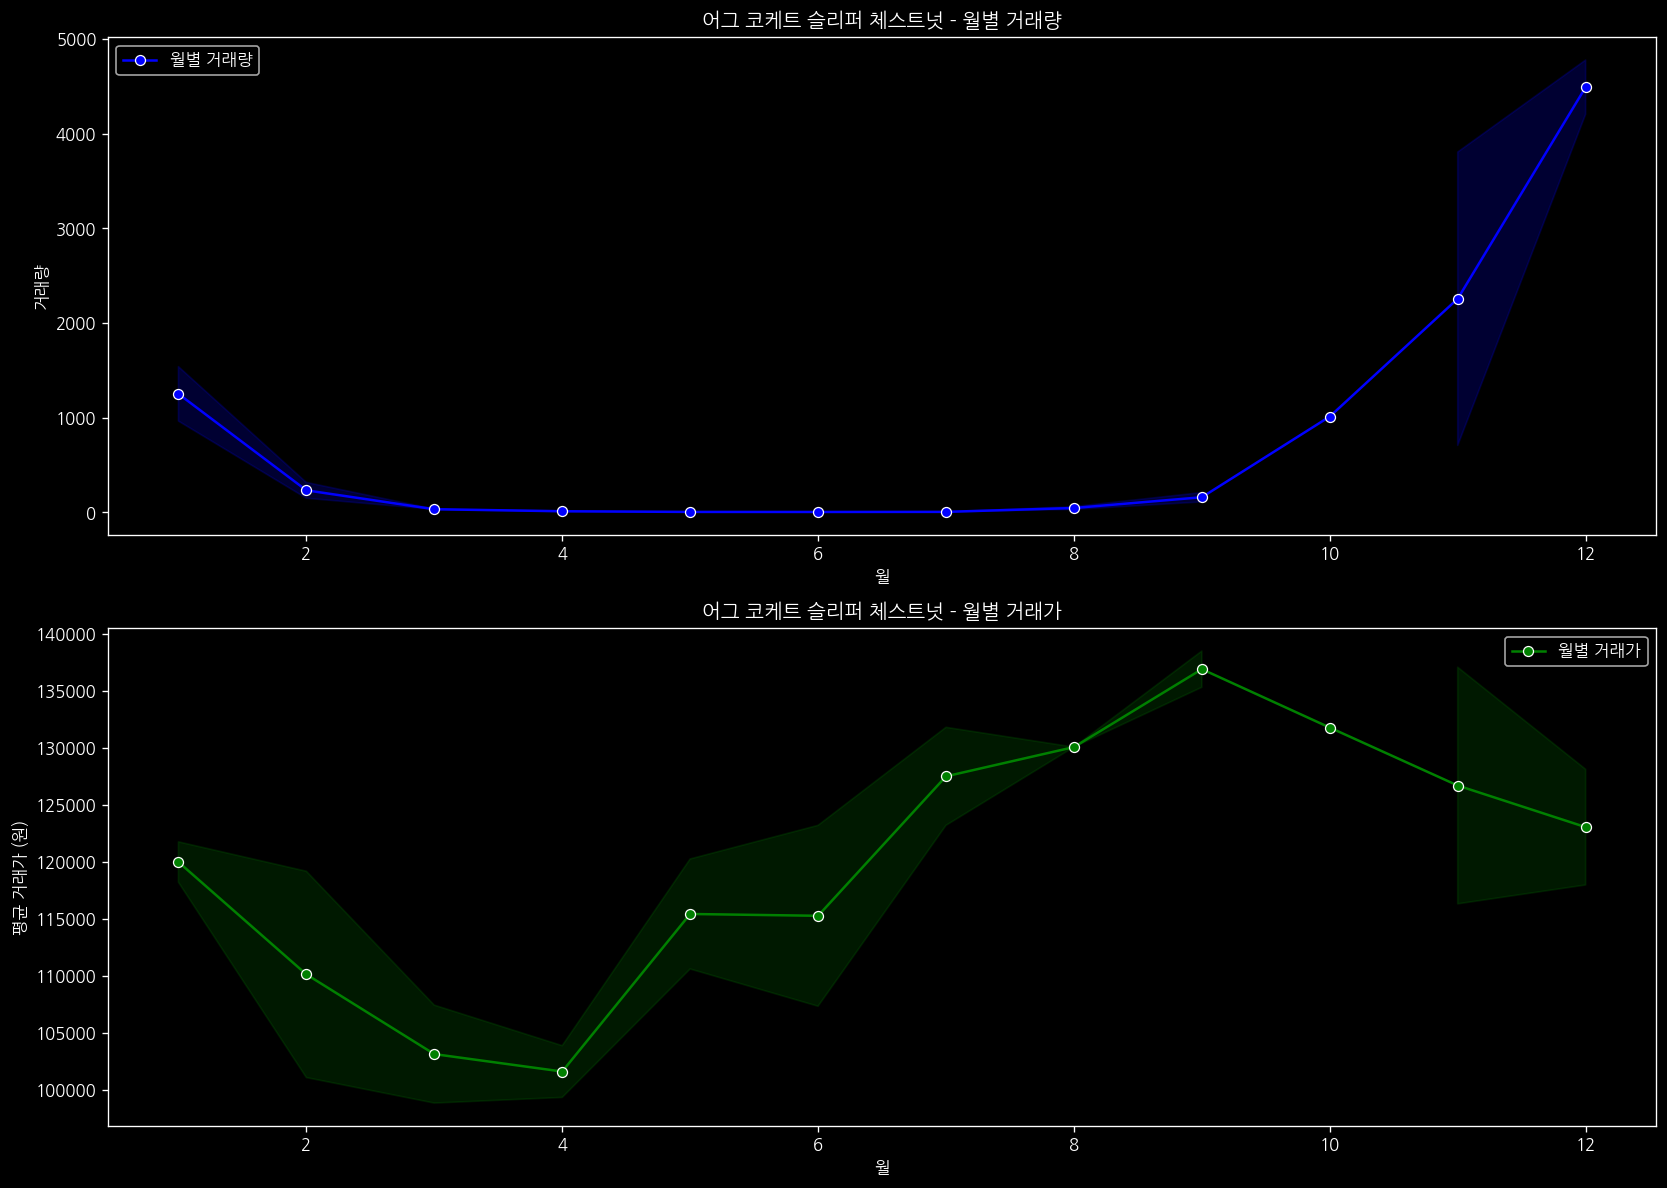

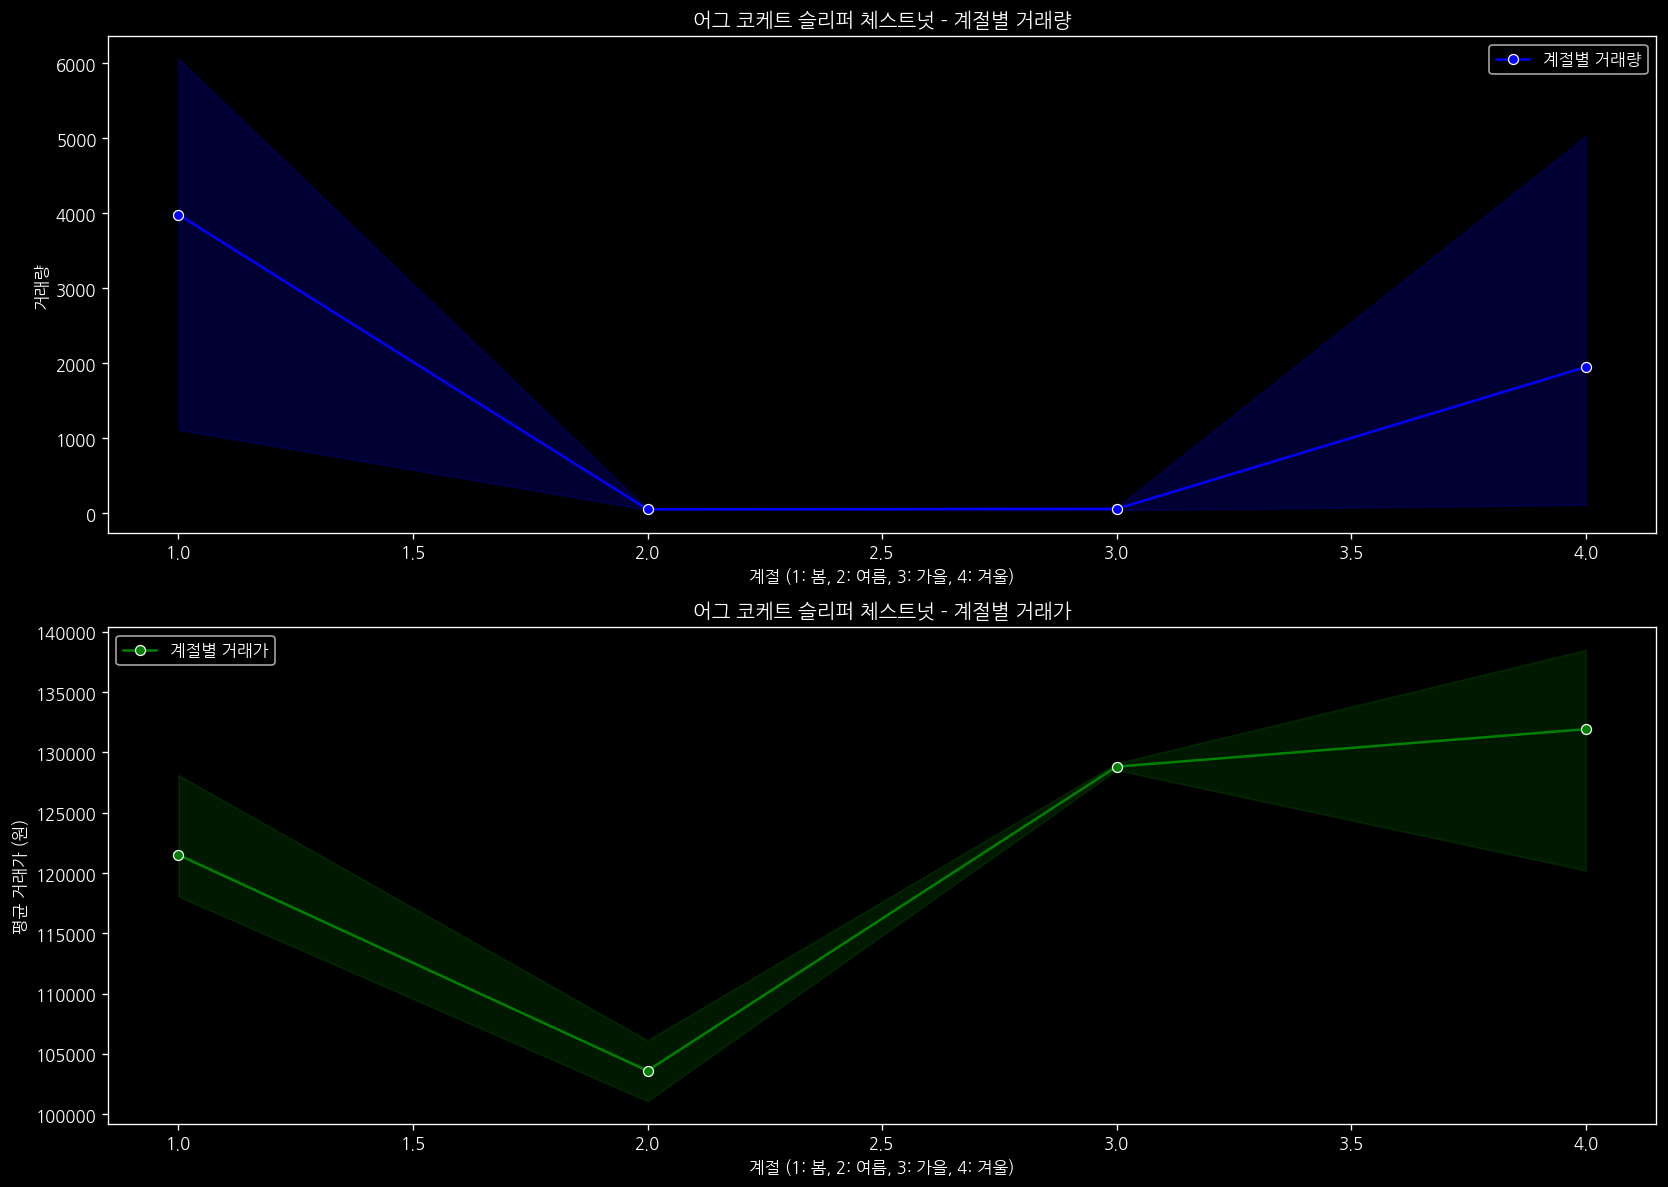

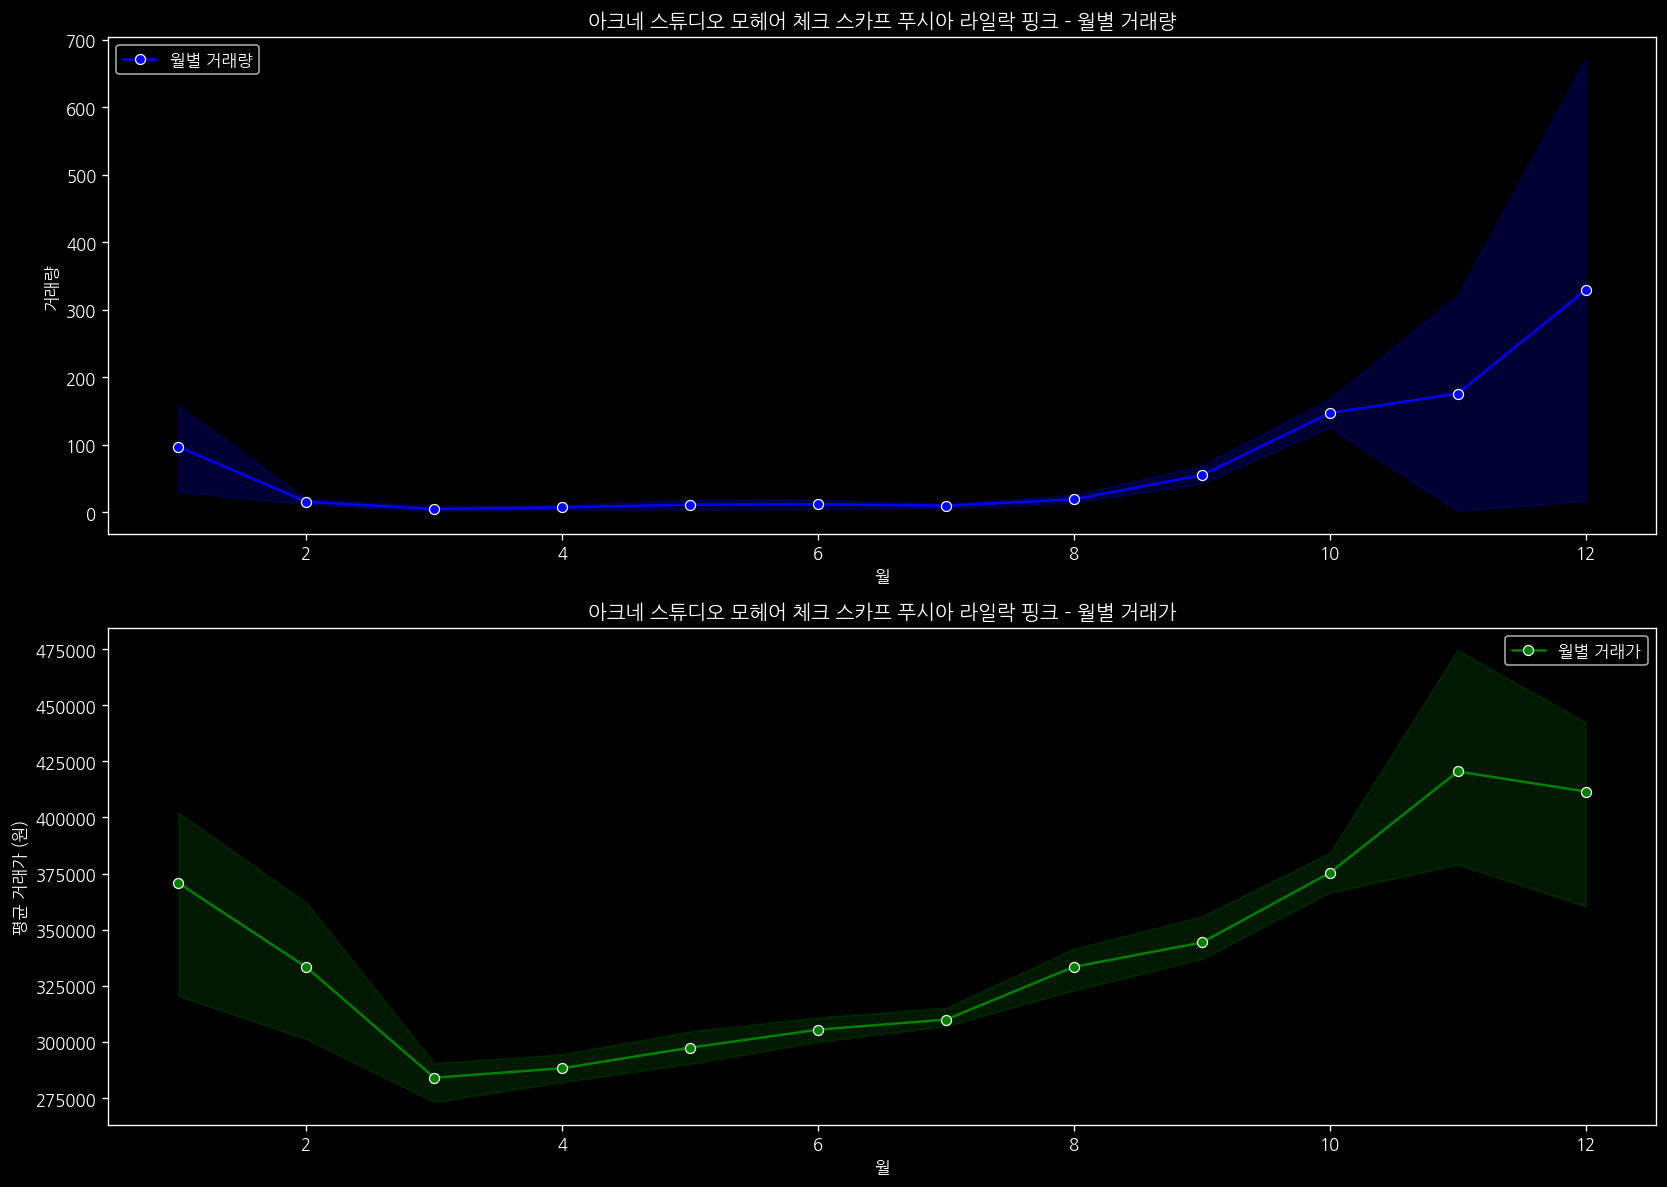

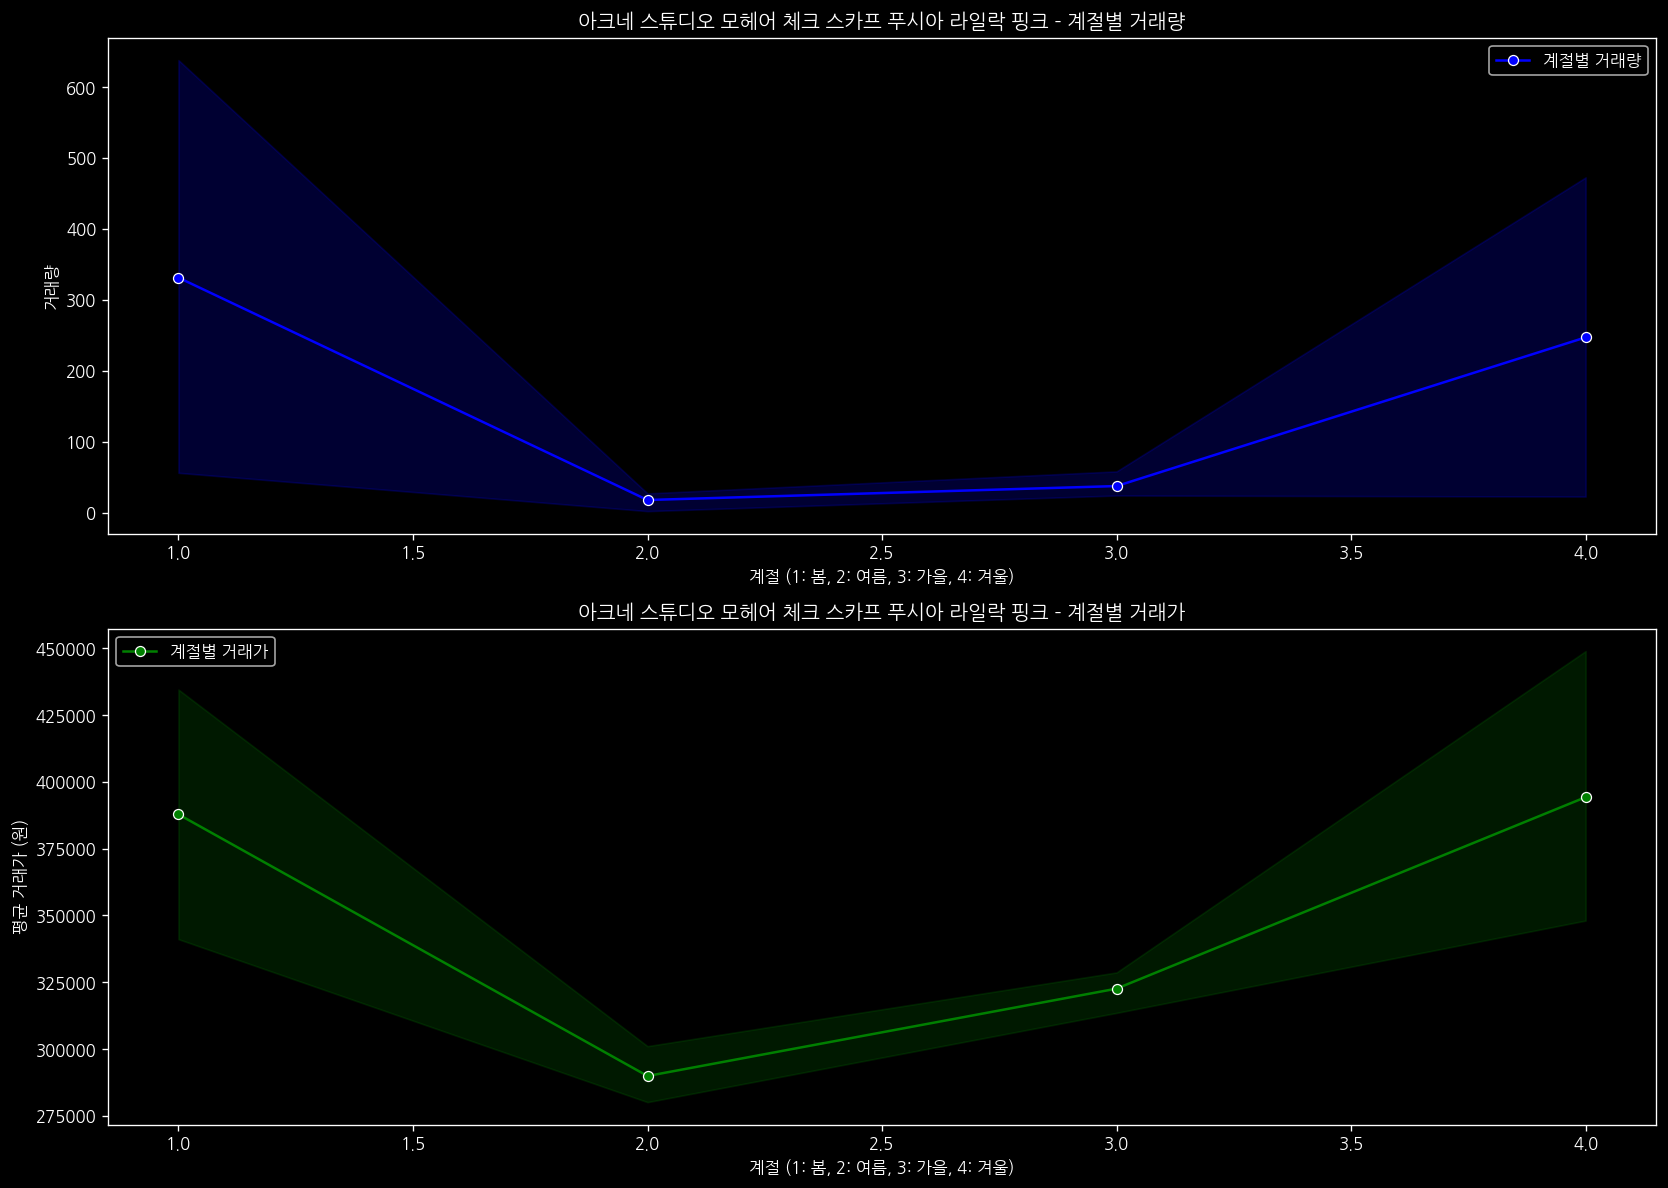

In [18]:
# Function to group and visualize data by month and season
def plot_trends(df, product_name):
    # Group by year and month to calculate monthly trends
    monthly_data = df.groupby(['year', 'month']).agg({
        '거래가': 'mean',    # Average transaction price per month
        '거래일': 'count'    # Number of transactions (volume)
    }).rename(columns={'거래일': '거래량'}).reset_index()
    
    # Group by year and season to calculate seasonal trends
    seasonal_data = df.groupby(['year', 'season']).agg({
        '거래가': 'mean',    # Average transaction price per season
        '거래일': 'count'    # Number of transactions (volume)
    }).rename(columns={'거래일': '거래량'}).reset_index()
    
    # Plot monthly trends
    fig, ax1 = plt.subplots(2, 1, figsize=(14, 10), dpi=120)

    sns.lineplot(x='month', y='거래량', data=monthly_data, ax=ax1[0], marker='o', label='월별 거래량', color='blue')
    ax1[0].set_title(f'{product_name} - 월별 거래량')
    ax1[0].set_xlabel('월')
    ax1[0].set_ylabel('거래량')

    sns.lineplot(x='month', y='거래가', data=monthly_data, ax=ax1[1], marker='o', label='월별 거래가', color='green')
    ax1[1].set_title(f'{product_name} - 월별 거래가')
    ax1[1].set_xlabel('월')
    ax1[1].set_ylabel('평균 거래가 (원)')

    plt.style.use('dark_background')
    plt.tight_layout()
    plt.show()

    # Plot seasonal trends
    fig, ax2 = plt.subplots(2, 1, figsize=(14, 10), dpi=120)

    sns.lineplot(x='season', y='거래량', data=seasonal_data, ax=ax2[0], marker='o', label='계절별 거래량', color='blue')
    ax2[0].set_title(f'{product_name} - 계절별 거래량')
    ax2[0].set_xlabel('계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)')
    ax2[0].set_ylabel('거래량')

    sns.lineplot(x='season', y='거래가', data=seasonal_data, ax=ax2[1], marker='o', label='계절별 거래가', color='green')
    ax2[1].set_title(f'{product_name} - 계절별 거래가')
    ax2[1].set_xlabel('계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)')
    ax2[1].set_ylabel('평균 거래가 (원)')

    plt.style.use('dark_background')
    plt.tight_layout()
    plt.show()

# Plot trends for each product
plot_trends(tnf, '노스페이스 화이트 라벨 노벨티 눕시 다운 자켓 코코아 브라운')
plot_trends(ugg, '어그 코케트 슬리퍼 체스트넛')
plot_trends(acne, '아크네 스튜디오 모헤어 체크 스카프 푸시아 라일락 핑크')